In [117]:
import pandas as pd

data = pd.read_csv('../data/data.csv')

In [118]:
y = data['Potability']
X = data.drop('Potability', axis=1).copy()

In [119]:
X.shape

(2011, 10)

In [120]:
X.head()

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
1,4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
2,5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
3,6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
4,7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425


In [121]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X)
X[X.columns] = ss.transform(X)

In [122]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X)

PCA(n_components=5)

In [123]:
pca_names = [f'PCA {i}' for i in range(pca.n_components_)]

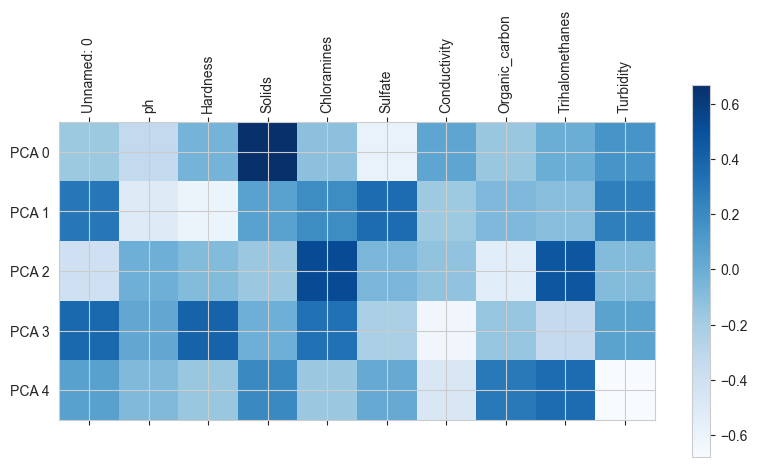

In [124]:
from matplotlib import pyplot as plt
import seaborn as sns

cmap = sns.color_palette("Blues", as_cmap=True)
plt.matshow(pca.components_, cmap=cmap)
plt.xticks(ticks=range(pca.components_.shape[1]),
           labels=X.columns,
           rotation='vertical')
plt.yticks(ticks=range(pca.n_components_),
           labels=pca_names)
plt.colorbar()
plt.show()

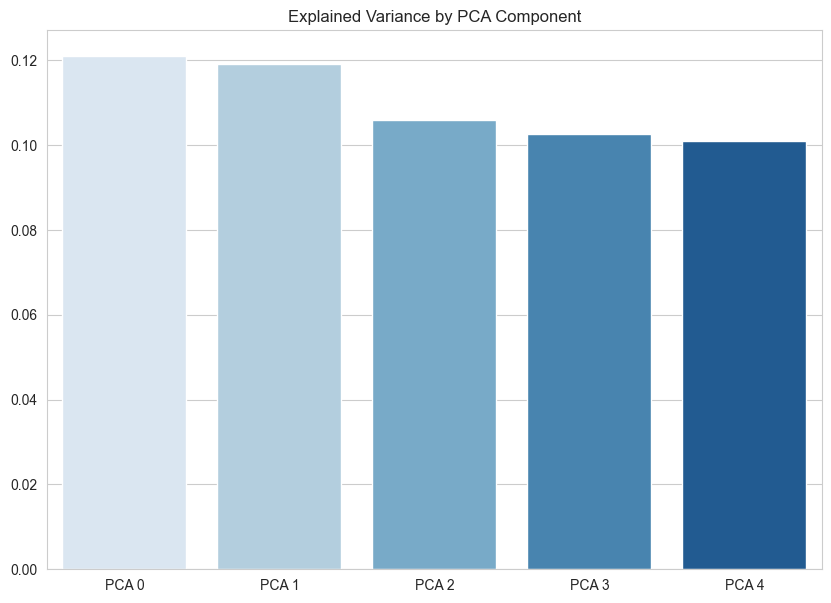

In [125]:
plt.figure(figsize=(10, 7))
sns.barplot(x=pca_names, y=pca.explained_variance_ratio_, palette="Blues")
plt.title('Explained Variance by PCA Component')
plt.show()

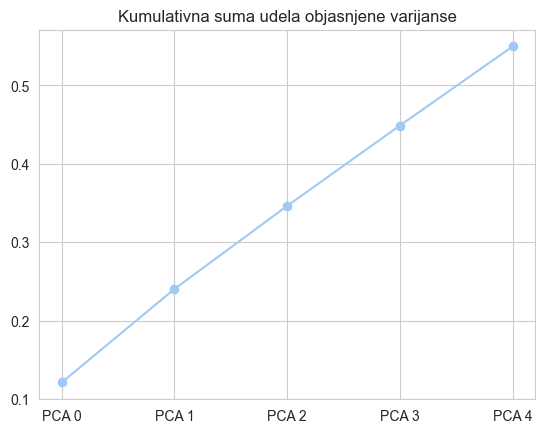

In [126]:
import numpy as np

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(pca_names, cumulative_variance_ratio, marker='o')
plt.title('Kumulativna suma udela objasnjene varijanse')
plt.show()

In [127]:
X_pca = pca.transform(X)

12


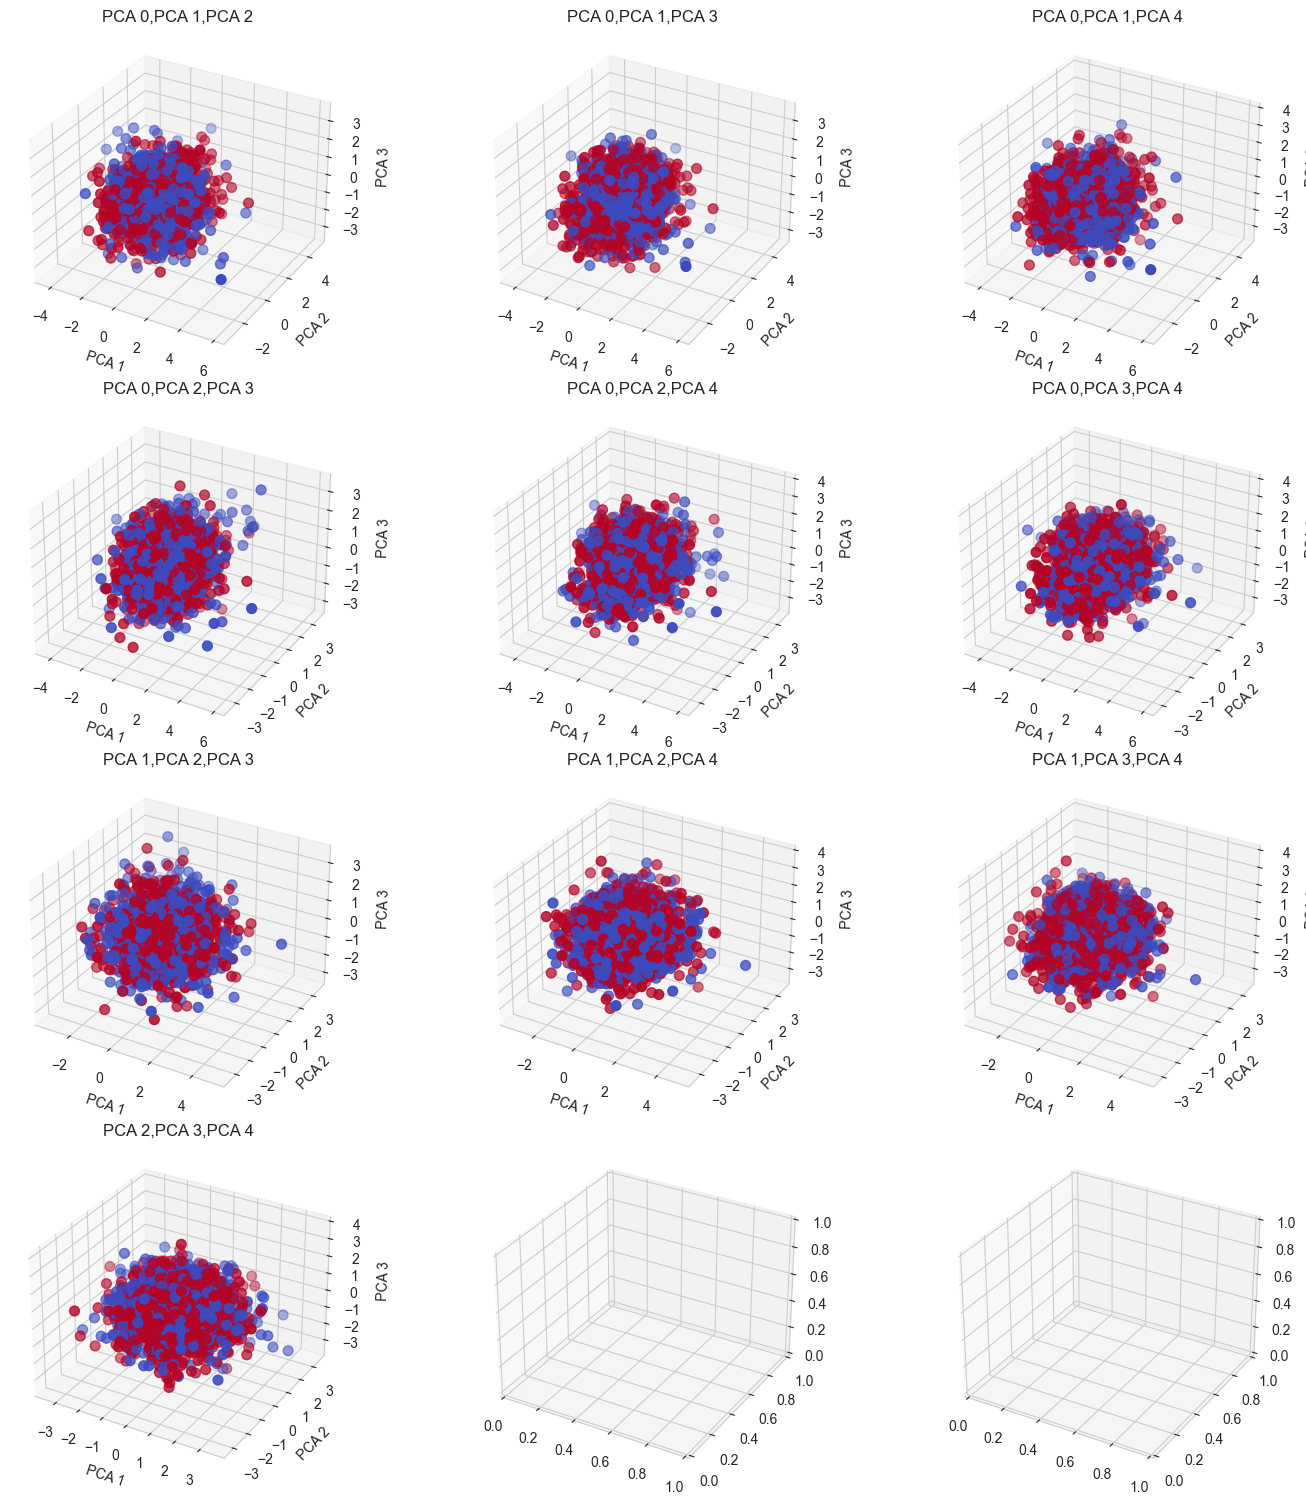

In [128]:
from itertools import combinations
from math import ceil, comb

sns.set_style("whitegrid")
sns.set_palette('pastel')

all_combinations = combinations([0, 1, 2, 3, 4], 3)
num_plots = comb(5, 3)

fig, axes = plt.subplots(nrows=ceil(num_plots / 3), ncols=3, figsize=(15, 15), subplot_kw={'projection': '3d'})
axs = axes.ravel()
print(len(axs))
for i, combination in enumerate(all_combinations):
    v1, v2, v3 = combination
    ax = axs[i]
    ax.scatter(X_pca[:, v1], X_pca[:, v2], X_pca[:, v3], c=y, edgecolor='face', s=50, cmap='coolwarm')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_zlabel('PCA 3')
    ax.set_title(",".join([f'PCA {v1}', f'PCA {v2}', f'PCA {v3}']))

plt.tight_layout()
plt.show()

In [129]:
pd.DataFrame(X_pca, columns=range(pca.n_components_)).to_csv('../data/X_pca.csv')